# IMPORTING LIBRARIES


In [1]:
#IMPORTING REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# STEP 1: READING DATASET AND UNDERSTANDING DATA


In [2]:
#READ THE CSV FILE
bike=pd.read_csv('/Users/SAITEJA/Downloads/day.csv')

In [3]:
#READ THE FIRST 5 ROWS
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#CHECKING SHAPE
bike.shape

(730, 16)

In [5]:
#CHECKING NULL
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#DESCRIBING DATA
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#CHECKING COLUMNS
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# CLEANING THE DATA

In [8]:
#ADDING day VARIABLE
bike['day'] = (pd.to_datetime(bike['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [9]:
#CHECKING FIRST 5 ROWS
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [10]:
#DROPPING 'instant' COLUMN
bike.drop(['instant'],axis=1, inplace= True)

In [11]:
#DROPPING 'dteday' COLUMN
bike.drop(['dteday'],axis=1, inplace= True)

In [12]:
#DROPPING 'casual' COLUMN
bike.drop(['casual'],axis=1, inplace= True)

In [13]:
#DROPPING 'registered' COLUMN
bike.drop(['registered'],axis=1, inplace= True)

In [14]:
#CHECKING DATAFRAME AFTER  DROPPING
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [15]:
#CHECKING NULL VALUES
bike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
day           0
dtype: int64

#### There are no null values

In [16]:
#CHECKING MATRIX
bike.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


In [17]:
# CONVERTING 'season' and 'weathersit' to categorical variable
bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike.mnth = bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike.weekday = bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [18]:
#CHECKING DATAFRAME AFTER REPLACING
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


# STEP 2: VISUALIZING THE DATA

<Figure size 864x1800 with 0 Axes>

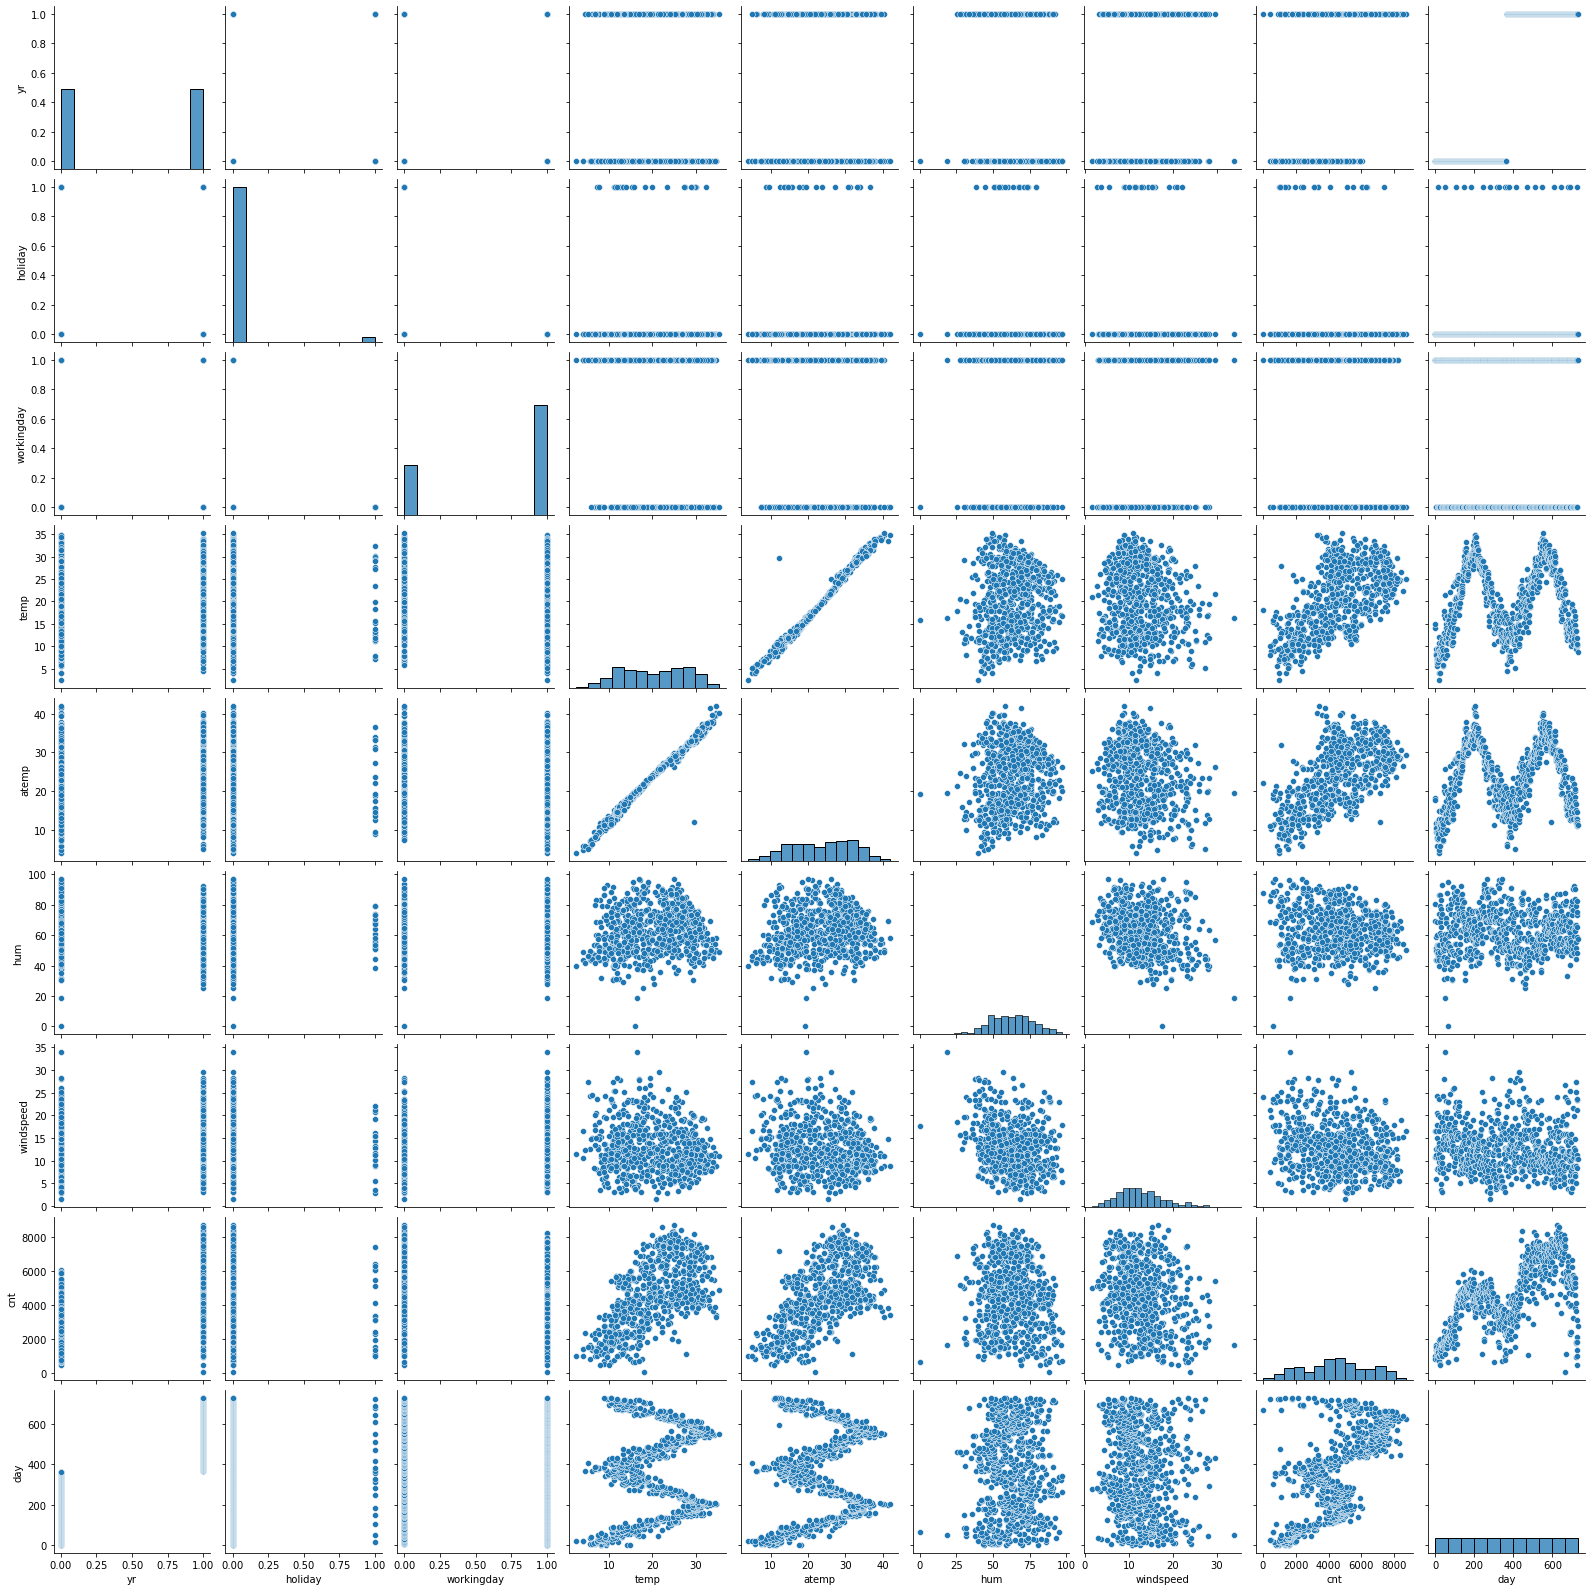

In [19]:
#DRAWING PAIRPLOTS TO FIND CORRELATION BETWEEN NUMERICAL VARIABLES
plt.figure(figsize=(12,25))
sns.pairplot(bike)
plt.show()

<Figure size 864x1800 with 0 Axes>

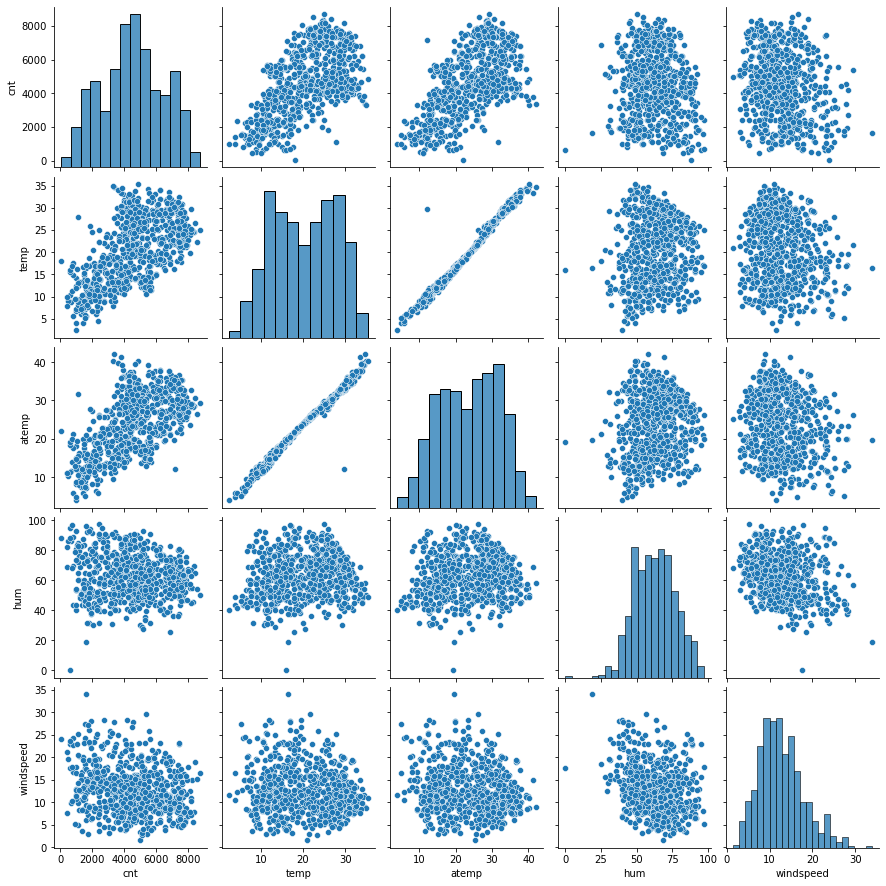

In [20]:
#DRAWING PAIRPLOTS TO FIND CORRELATION BETWEEN CONTINUOUS NUMERICAL VARIABLES
plt.figure(figsize = (12,25))
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

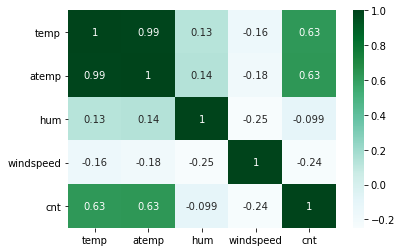

In [21]:
#CHECKING RELATIONSHIP OF CONTINUOUS VARIABLE
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

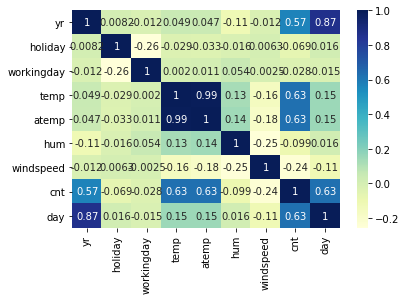

In [22]:
#CHECKING CORRELATIONS FOR NUMERIC VARIABLES
correlation=bike.corr()
sns.heatmap(correlation, cmap="YlGnBu", annot = True)
plt.show()

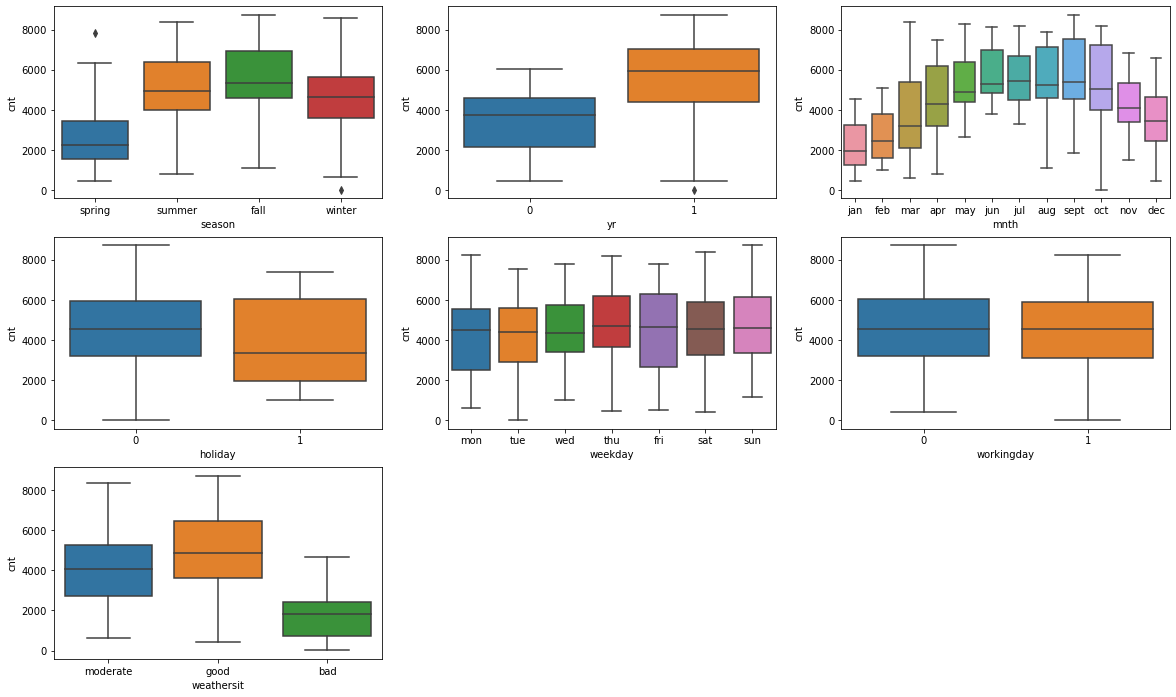

In [23]:
#ANALYSING CATEGORICAL VARIABLES WITH TARGET VARIABLES USING BOXPLOT
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()


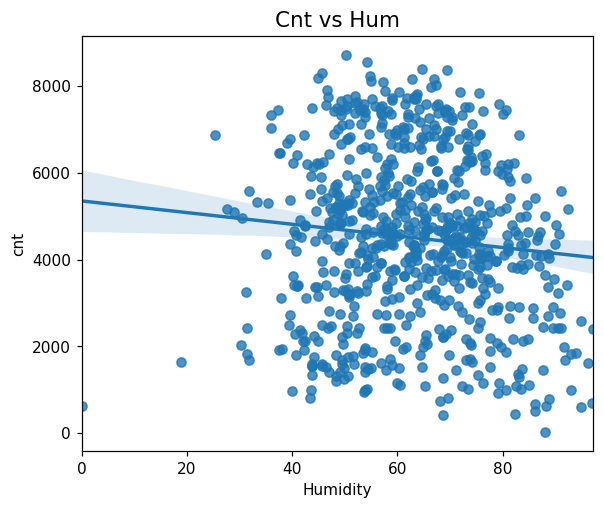

In [24]:
#ANALYSING cnt vs hum
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=14)
sns.regplot(data=bike,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

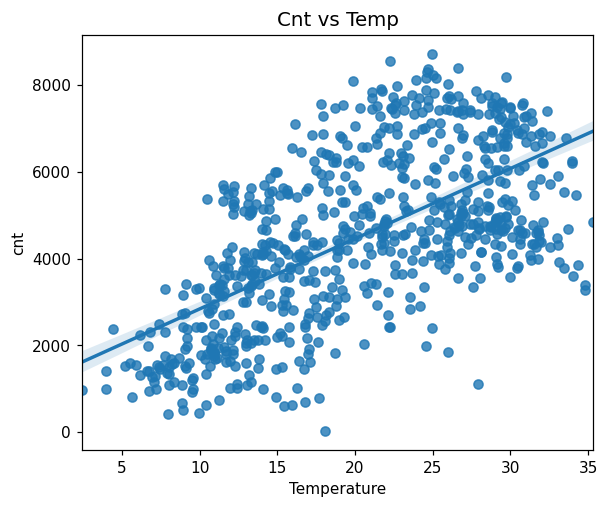

In [25]:
#ANALYSING cnt vs temp
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp", fontsize=13)
sns.regplot(data=bike, y="cnt", x="temp")
plt.xlabel("Temperature")
plt.show()

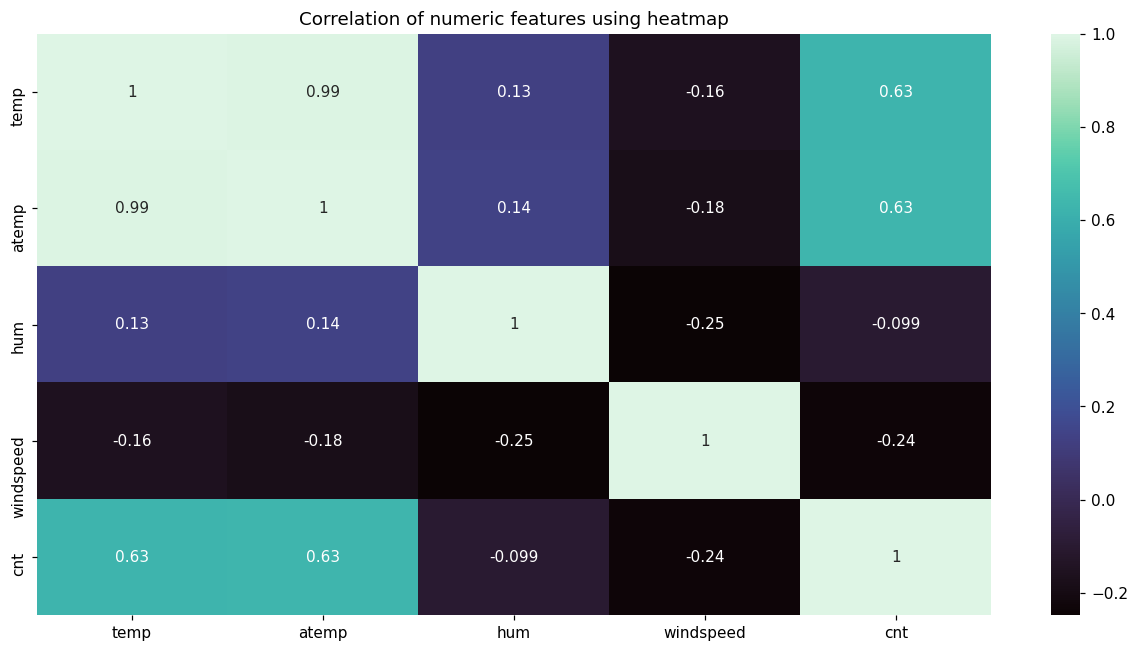

In [26]:
#CORRELATION OF NUMERIC FEATURES USING HEATMAP
numeric=["temp", "atemp", "hum","windspeed","cnt"]
plt.figure(figsize=(14,7), dpi=110)
plt.title("Correlation of numeric features using heatmap", fontsize=12)
sns.heatmap(bike[numeric].corr(), annot=True,cmap="mako")
plt.show()


### STEP 3: DATA PREPARATION FOR LINEAR REGRESSION

In [27]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL VARIABLES
bike=pd.get_dummies(data=bike,columns=["season","mnth","weekday"],drop_first=True)
bike=pd.get_dummies(data=bike,columns=["weathersit"])

In [28]:
#PRINTING COLUMNS 
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'day', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [29]:
#PRINTING FIRST FEW ROWS
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


# STEP 4: MODEL BUILDING

In [30]:
#CHECKING SHAPE BEFORE SPLITTING
bike.shape

(730, 32)

In [31]:
#SPLITTING INTO TRAIN & TEST SET
y=bike.pop('cnt')

In [32]:
X=bike

In [33]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
#INSPECTING X VARIABLE
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,day,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
# CHECKING SHAPE & SIZE FOR TRAIN & TEST 
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


In [36]:
# IMPORTING REQUIRED LIBRARY
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [37]:
#SCALING CONTINUOUS VARIABLES
variable=['temp', 'atemp', 'hum', 'windspeed', 'day']

In [38]:
#SCALING USING NORMALIZED SCALER
scaler=MinMaxScaler()

In [39]:
#FITTING & TRANSFORMING TRAINING SET
X_train[variable]=scaler.fit_transform(X_train[variable])

In [40]:
#INSPECTING TRANING SET AFTER SCALING
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,day,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
#BUILDING LINEAR REGRESSION MODEL
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
#REDUCING NUMBER OF FEATURES USING AUTOMATED APPROACH
rfe=RFE(lr,15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [43]:
#BUILDING MODEL USING STATSMODEL
def build_model(col):
    X_train_sm=sm.add_constant(X_train[col])
    lm=sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [44]:
#FUNCTION TO CALCULATE VIF
def get_vif(col):
    df1 = X_train[col]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [45]:
#COLUMNS SELECTED BY RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'day',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [46]:
#COLUMNS not SELECTED BY RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [47]:
#INSPECTING THE COLUMNS SUPPORTED BY RFE
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'day',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']]

In [48]:
#CHECKING SHAPE
X_train_rfe.shape

(511, 15)

## MODEL 1: VARIABLES SELECTED BY RFE

In [49]:
#COLUMNS SELECTED BY RFE FOR MODEL 1
col=['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'day',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.14e-186
Time:                        10:22:52   Log-Likelihood:                -4123.9
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     495   BIC:                             8348.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2901.8234    342.951     

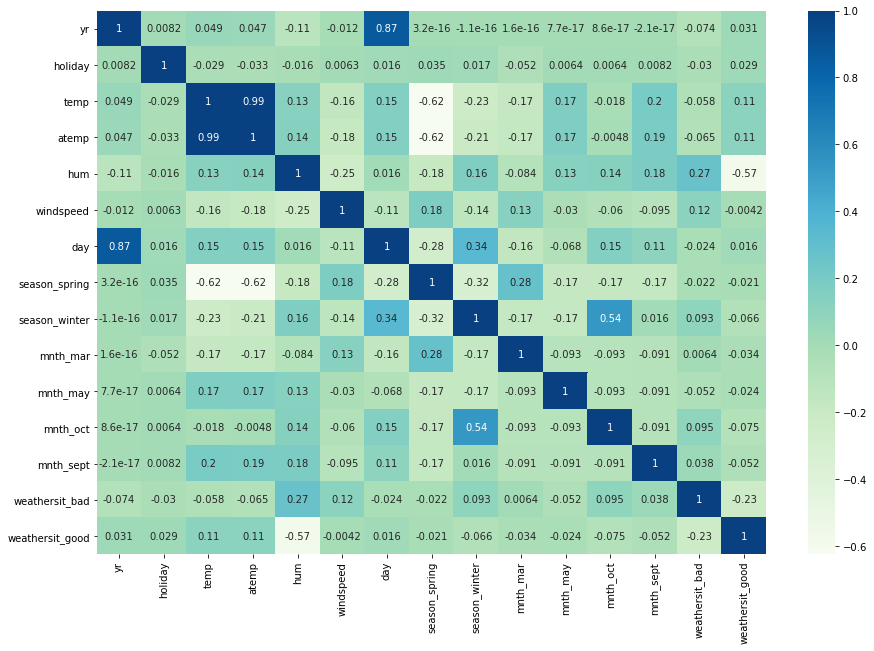

In [50]:
#CHECKING CORRELATION OF FEATURES SELECTED BY RFE WITH TARGET COLUMN
plt.figure(figsize = (15,10))
sns.heatmap(bike[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'day',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']].corr(),cmap='GnBu',annot=True)
plt.show()

# MODEL 2

In [51]:
#DROPPING VARIABLE hum as it has negative coefficient and is insignificant
col=['yr', 'holiday', 'temp', 'atemp', 'windspeed', 'day',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.81e-183
Time:                        10:22:56   Log-Likelihood:                -4133.3
No. Observations:                 511   AIC:                             8297.
Df Residuals:                     496   BIC:                             8360.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1866.1808    249.826     

# MODEL 3

In [52]:
#DROPPING VARIABLE temp as it has negative coefficient and is insignificant
col=['yr', 'holiday', 'atemp', 'windspeed', 'day',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.49e-184
Time:                        10:22:56   Log-Likelihood:                -4133.9
No. Observations:                 511   AIC:                             8296.
Df Residuals:                     497   BIC:                             8355.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1824.8195    246.817     

# MODEL 4

In [53]:
#DROPPING VARIABLE holiday as it has negative coefficient and is insignificant
col=['yr', 'atemp', 'windspeed', 'day',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.73e-183
Time:                        10:22:56   Log-Likelihood:                -4138.3
No. Observations:                 511   AIC:                             8303.
Df Residuals:                     498   BIC:                             8358.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1801.9620    248.589     

# MODEL 5


In [54]:
#DROPPING VARIABLE season_spring as it has negative coefficient and is insignificant
col=['yr', 'atemp', 'windspeed', 'day',
     'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     182.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.69e-167
Time:                        10:22:56   Log-Likelihood:                -4180.0
No. Observations:                 511   AIC:                             8384.
Df Residuals:                     499   BIC:                             8435.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              79.2987    182.001     

# MODEL 6

In [55]:
#DROPPING VARIABLE windspeed as it has negative coefficient and is insignificant
col=['yr', 'atemp','day',
     'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     199.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.95e-167
Time:                        10:22:56   Log-Likelihood:                -4181.9
No. Observations:                 511   AIC:                             8386.
Df Residuals:                     500   BIC:                             8432.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -147.6903    137.815     

# MODEL 7


In [56]:
#DROPPING VARIABLE mnth_may 
col=['yr', 'atemp','day',
     'season_winter', 'mnth_mar', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     212.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.81e-165
Time:                        10:22:56   Log-Likelihood:                -4191.0
No. Observations:                 511   AIC:                             8402.
Df Residuals:                     501   BIC:                             8444.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -100.3000    139.678     

In [57]:
#Automating feature slection by building model of all columns
def build_model_sk(X,y):
    lr1=LinearRegression()
    lr1.fit(X,y)
    return lr1

In [58]:
#Building final model using sklearn
cols = ['yr', 'atemp','day', 'season_winter', 'mnth_mar', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']

#Building model with above columns
lr = build_model_sk(X_train[col],y_train)
print(lr.intercept_,lr.coef_)

-100.30000940247464 [ 2298.16339621  5814.0183608   -667.20968921  1089.24532994
   345.47335497   352.8246638    717.09187225 -1535.92967108
   627.841467  ]


# STEP 5: MODEL EVALUATION

In [59]:
#RESIDUAL ANALYSIS
y_train_pred = lr.predict(X_train[col])

In [60]:
#Plotting histogram of error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

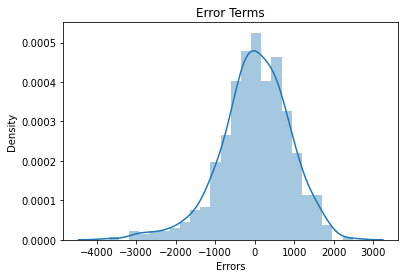

In [61]:
plot_res_dist(y_train,y_train_pred)

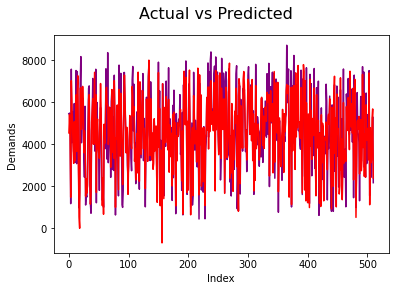

In [62]:
#Actual vs Predicted model
r = [i for i in range(0,len(X_train),1)]
plt.plot(r,y_train, color="purple")
plt.plot(r,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 16)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [63]:
# Finding out R squared value between train and predicted train data sets.  
r2_score(y_train,y_train_pred)

0.7924228974232925

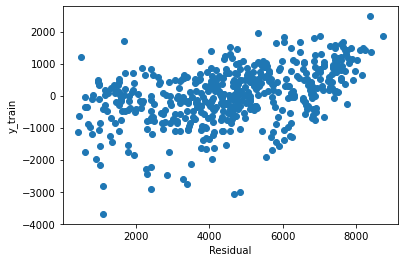

In [64]:
#scatter plot
res = (y_train - y_train_pred)
plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [65]:
#scaling variable in X_test
vars=['temp','atemp','hum','windspeed','day']

#Transforming only Test data & no Fitting
X_test[vars] = scaler.transform(X_test[vars])

In [66]:
#Selecting Columns from our final model
cols = ['yr', 'atemp','day', 'season_winter', 'mnth_mar', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']

#Predicting the values for test data
y_test_pred = lr.predict(X_test[cols])

In [67]:
# Finding out R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.7692001429136691

## Homoscedacity

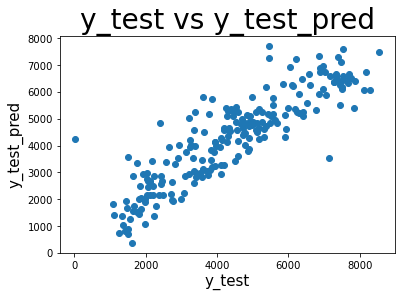

In [70]:
# Plotting y_test and y_test_pred to understand the spread of data

plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_test_pred', fontsize = 28)              
plt.xlabel('y_test', fontsize = 15)                          
plt.ylabel('y_test_pred', fontsize = 15)
plt.show()

## Making Predictions

In [71]:
#Checking data
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,day,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [72]:
#rebuilding the final model for manual + rfe approach using statsmodel for interpreting.
cols = ['yr', 'atemp','day', 'season_winter', 'mnth_mar', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     212.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.81e-165
Time:                        10:34:14   Log-Likelihood:                -4191.0
No. Observations:                 511   AIC:                             8402.
Df Residuals:                     501   BIC:                             8444.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -100.3000    139.678     